In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Define file path
file_path = '../data/AnomaData.xlsx'

In [3]:
# Read the data from the source file
data = pd.read_excel(file_path)

In [4]:
# Exploratory Data Analysis (EDA)
# Check data
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


In [5]:
# Display the first five rows of the dataset
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [6]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [7]:
# Check the data types of the columns
data.dtypes

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

In [8]:
# Check summary statistics of numerical columns
data.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


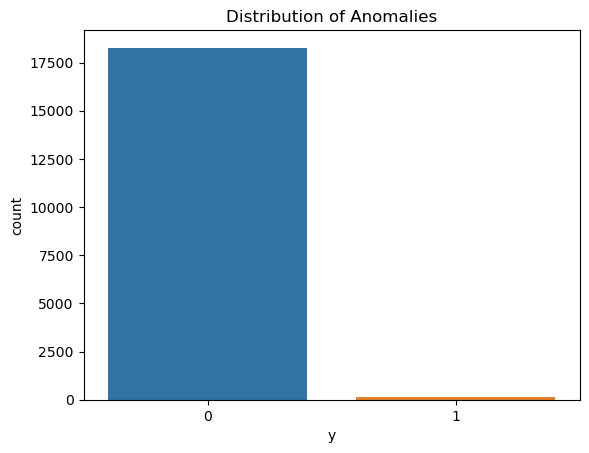

In [9]:
# Data visualization to check for anomalies:
# Check for class imbalance
sns.countplot(x='y', data=data)
plt.title('Distribution of Anomalies')
plt.savefig('../visuals/anomalies-distribution.png')
plt.show()

In [10]:
#Check for Duplicates 
data.duplicated().sum()

0

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [12]:
missing_values_percentage = (missing_values / len(data)) * 100
print(missing_values_percentage)
missing_values_numeric = missing_values.astype(int)

time    0.0
y       0.0
x1      0.0
x2      0.0
x3      0.0
       ... 
x57     0.0
x58     0.0
x59     0.0
x60     0.0
y.1     0.0
Length: 62, dtype: float64


In [13]:
# Handling missing values
# Drop rows with missing values
data.dropna(inplace=True)

In [14]:
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


In [15]:
# Recheck for missing values after dropping rows
missing_values = data.isnull().sum()

In [16]:
missing_values

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [17]:
# Convert `time` column to datetime
data['time'] = pd.to_datetime(data['time'], errors='coerce')

In [18]:
data.dtypes

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

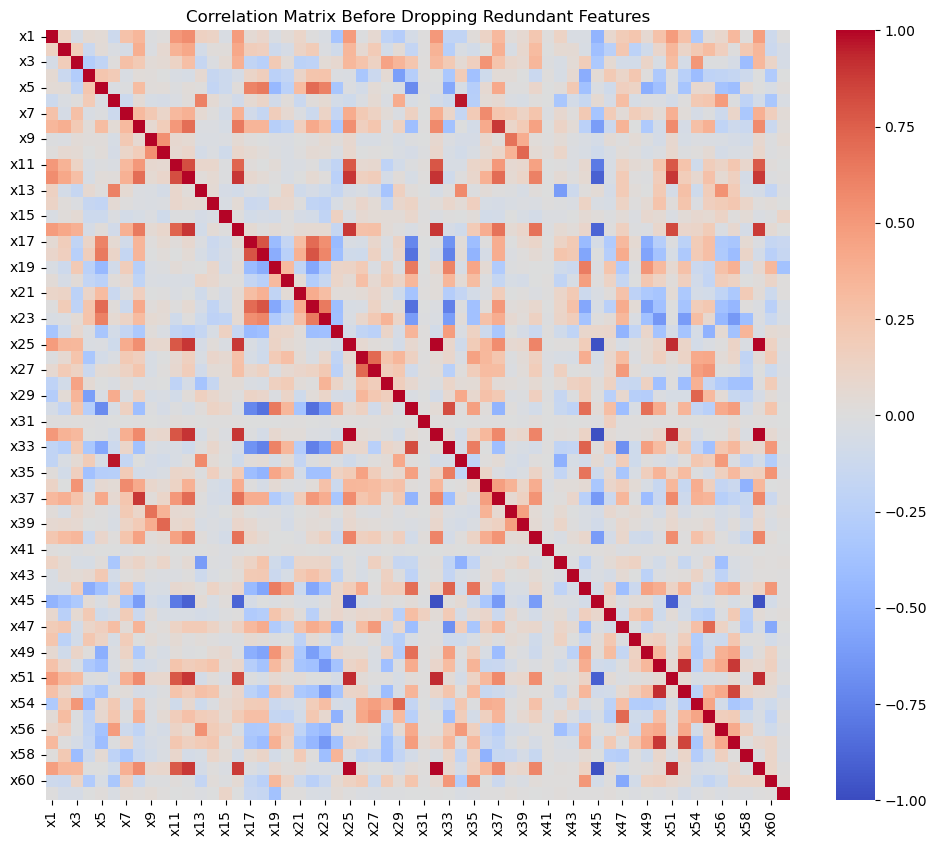

In [19]:
# Correlation matrix

# Exclude target variable `y` and any non-numeric columns like `time`
predictors = data.drop(columns=['y', 'time'], errors='ignore')
target_var = data[['time', 'y']]

# Compute correlation matrix
correlation_matrix = predictors.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix Before Dropping Redundant Features')
plt.savefig('../visuals/correlation-matrix.png')
plt.show()

Dropped features: ['x32', 'x34', 'x51', 'x52', 'x59', 'x45']


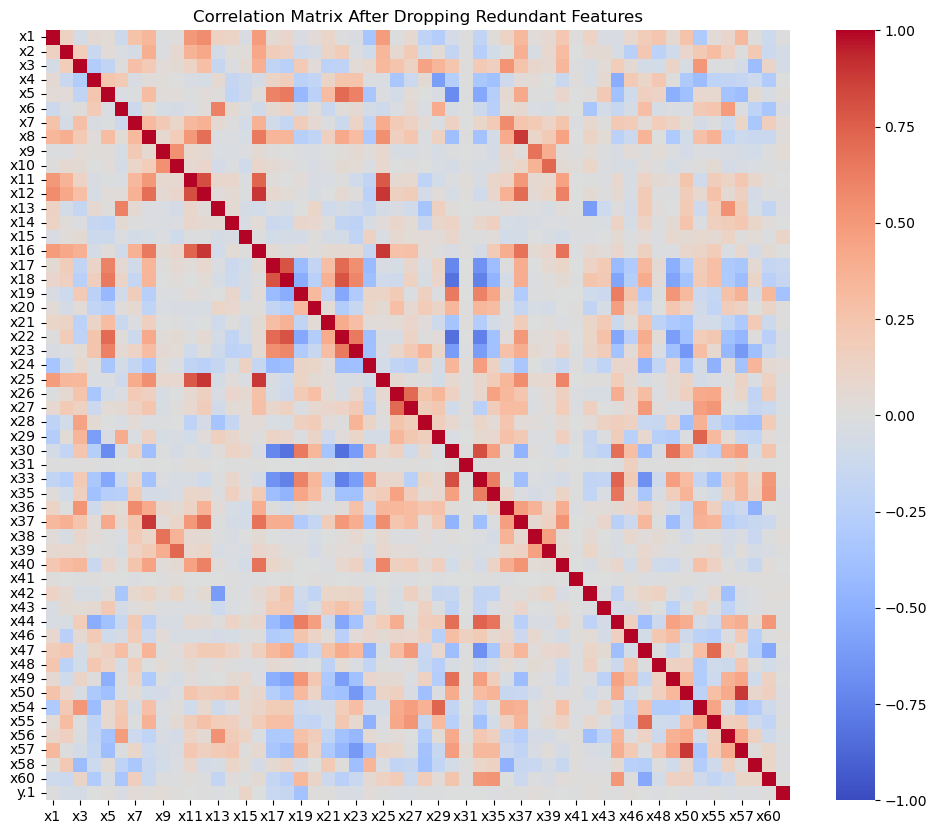

In [20]:
# Feature Engineering and Selection
# Drop columns with high correlation or redundant information
def drop_highly_correlated_features(data, threshold=0.9):
    """
    Identify and drop features that are highly correlated.

    Args:
        data (pd.DataFrame): DataFrame with predictor variables.
        threshold (float): Correlation threshold for identifying redundancy.

    Returns:
        pd.DataFrame: DataFrame with redundant features removed.
        list: List of dropped features.
    """
    # Compute correlation matrix
    correlation_matrix = data.corr()
    
    # Create a mask for highly correlated features
    upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    high_correlation_pairs = correlation_matrix.where(upper_triangle).stack()
    redundant_features = high_correlation_pairs[high_correlation_pairs.abs() > threshold]
    
    # Identify features to drop
    to_drop = set()
    for feature1, feature2 in redundant_features.index:
        to_drop.add(feature2)  # Keep only one feature per highly correlated pair

    return data.drop(columns=to_drop), list(to_drop)

# Perform correlation analysis on the predictors (excluding `y` and `time`)
data_cleaned, dropped_features = drop_highly_correlated_features(predictors)

# Display dropped features
print(f"Dropped features: {dropped_features}")

# Heatmap of the remaining correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned.corr(), annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix After Dropping Redundant Features')
plt.savefig('../visuals/correlation-matrix-after-feature-engineering.png')
plt.show()

In [26]:
data_cleaned

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x48,x49,x50,x54,x55,x56,x57,x58,x60,y.1
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,0.084856,10.210182,11.295155,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.006076,0
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,0.085146,12.534340,11.290761,-4.937179,-32.413266,22.760065,2.682933,0.033536,0.006083,0
2,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,0.085436,18.582893,11.286366,-4.937924,-34.183774,27.004663,3.537487,0.033629,0.006090,0
3,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,0.085726,17.719032,11.281972,-4.938669,-35.954281,21.672449,3.986095,0.033721,0.006097,0
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,0.086016,16.855202,11.277577,-4.939414,-37.724789,21.907251,3.601573,0.033777,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,-0.080108,-0.038189,...,0.027491,-24.370171,-1.917980,2.682413,6.944644,-37.795661,-0.860218,0.010220,-0.011242,0
18394,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,-0.080108,-0.038189,...,0.027201,-19.043419,-1.917980,2.683338,0.507755,-39.357199,-0.915698,0.010620,-0.011235,0
18395,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,-0.080108,-0.038189,...,0.026911,-21.421471,-1.917980,2.684263,2.809146,-39.357199,-1.409596,0.013323,-0.011228,0
18396,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,-0.080108,-0.038189,...,0.026621,-24.462059,-1.917980,2.685189,2.164859,-39.357199,-0.860218,0.012888,-0.011221,0


In [27]:
# Separate features and target
X = data_cleaned
y = target_var['y']

In [28]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
# Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Model Selection and Training
model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [32]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [33]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [34]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
# Model Evaluation
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

In [36]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.76      0.64      0.70        25

    accuracy                           1.00      3680
   macro avg       0.88      0.82      0.85      3680
weighted avg       1.00      1.00      1.00      3680



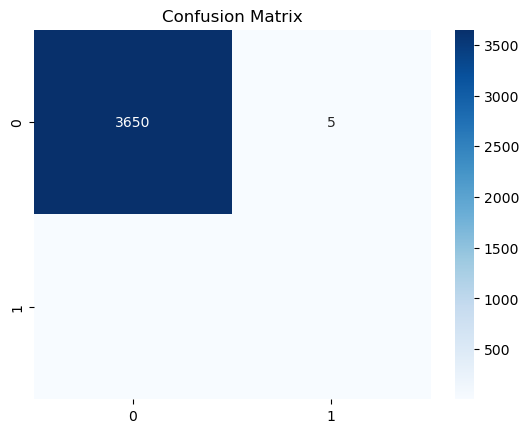

In [37]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../visuals/confusion-matrix.png')
plt.show()

In [38]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9903146374829


In [39]:
# Model Deployment Plan
# Save the model and scaler for future use
joblib.dump(best_model, "../models/anomaly_detector_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
